In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors
import datetime

In [2]:
records = pd.read_csv("stray-merged.csv", encoding='latin-1')

In [3]:
records = records[records["Outcome Type"] != 'Disposal']
records = records[records["Outcome Type"] != 'Missing']
records = records.replace('Rto-Adopt', 'Adoption')
records = records.reset_index(drop = True)

In [4]:
records['DateTime_In']=pd.to_datetime(records['DateTime_In'])
records['month']=""
#records["DateTime"][0].month

In [5]:
records.head()

,Unnamed: 0,Animal ID,Name_In,DateTime_In,Intake Type,Intake Condition,Animal Type_In,Sex upon Intake,Age upon Intake,Breed,...,Longitude,Name_Out,DateTime_Out,Date of Birth,Outcome Type,Outcome Subtype,Animal Type_Out,Sex upon Outcome,Age upon Outcome,month
0,0,A773634,Augie,2018-06-03 15:26:00,Stray,Normal,Dog,Intact Male,10 years,Dachshund Mix,...,-97.676367,Augie,06/05/2018 11:39:00 AM,06/05/2008,Return to Owner,NaN,Dog,Intact Male,10 years,
1,1,A782291,NaN,2018-10-13 10:59:00,Stray,Normal,Dog,Intact Female,2 years,Labrador Retriever Mix,...,-97.688846,NaN,10/17/2018 04:13:00 PM,10/13/2016,Adoption,NaN,Dog,Spayed Female,2 years,
2,2,A782085,Luna,2018-10-10 13:21:00,Stray,Normal,Dog,Intact Female,1 month,Black Mouth Cur Mix,...,-97.767135,Luna,10/14/2018 05:02:00 PM,08/10/2018,Adoption,NaN,Dog,Spayed Female,2 months,
3,3,A783925,NaN,2018-11-08 17:56:00,Stray,Normal,Dog,Intact Female,1 year,Pit Bull,...,-97.755867,NaN,11/12/2018 04:04:00 PM,11/08/2017,Transfer,Partner,Dog,Intact Female,1 year,
4,4,A768476,*Fialla,2018-03-20 10:57:00,Stray,Normal,Dog,Intact Female,2 years,Smooth Fox Terrier Mix,...,-97.949694,*Fialla,03/27/2018 02:16:00 PM,03/20/2016,Transfer,Partner,Dog,Intact Female,2 years,


In [6]:
records['month'][0] = records['DateTime_In'][0].month

C:\Users\Alex Hilton\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [7]:
s1 = pd.Series([])
for i in range(len(records)):
     s1.set_value(i, records['DateTime_In'][i].month)

C:\Users\Alex Hilton\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
records['month'] = s1

In [9]:
records.head()

,Unnamed: 0,Animal ID,Name_In,DateTime_In,Intake Type,Intake Condition,Animal Type_In,Sex upon Intake,Age upon Intake,Breed,...,Longitude,Name_Out,DateTime_Out,Date of Birth,Outcome Type,Outcome Subtype,Animal Type_Out,Sex upon Outcome,Age upon Outcome,month
0,0,A773634,Augie,2018-06-03 15:26:00,Stray,Normal,Dog,Intact Male,10 years,Dachshund Mix,...,-97.676367,Augie,06/05/2018 11:39:00 AM,06/05/2008,Return to Owner,NaN,Dog,Intact Male,10 years,6
1,1,A782291,NaN,2018-10-13 10:59:00,Stray,Normal,Dog,Intact Female,2 years,Labrador Retriever Mix,...,-97.688846,NaN,10/17/2018 04:13:00 PM,10/13/2016,Adoption,NaN,Dog,Spayed Female,2 years,10
2,2,A782085,Luna,2018-10-10 13:21:00,Stray,Normal,Dog,Intact Female,1 month,Black Mouth Cur Mix,...,-97.767135,Luna,10/14/2018 05:02:00 PM,08/10/2018,Adoption,NaN,Dog,Spayed Female,2 months,10
3,3,A783925,NaN,2018-11-08 17:56:00,Stray,Normal,Dog,Intact Female,1 year,Pit Bull,...,-97.755867,NaN,11/12/2018 04:04:00 PM,11/08/2017,Transfer,Partner,Dog,Intact Female,1 year,11
4,4,A768476,*Fialla,2018-03-20 10:57:00,Stray,Normal,Dog,Intact Female,2 years,Smooth Fox Terrier Mix,...,-97.949694,*Fialla,03/27/2018 02:16:00 PM,03/20/2016,Transfer,Partner,Dog,Intact Female,2 years,3


In [10]:
#stray_clustering = records.drop(['Intake Type_In','Unnamed: 0','index','Unnamed: 0.1','Animal ID','Name','DateTime','MonthYear','Address','City', 'State','Address.1','Color','Breed'],axis = 1)
stray_clustering = records[['Intake Condition', 'Animal Type_In', 'Sex upon Intake', 'Age upon Intake', 'Outcome Type', 'Latitude', 'Longitude', 'month']]

In [11]:
stray_clustering.head(50)

,Intake Condition,Animal Type_In,Sex upon Intake,Age upon Intake,Outcome Type,Latitude,Longitude,month
0,Normal,Dog,Intact Male,10 years,Return to Owner,30.377715,-97.676367,6
1,Normal,Dog,Intact Female,2 years,Adoption,30.276051,-97.688846,10
2,Normal,Dog,Intact Female,1 month,Adoption,30.191424,-97.767135,10
3,Normal,Dog,Intact Female,1 year,Transfer,30.192119,-97.755867,11
4,Normal,Dog,Intact Female,2 years,Transfer,30.570514,-97.949694,3
5,Normal,Cat,Intact Female,1 month,Adoption,30.173212,-97.806585,7
6,Normal,Dog,Intact Male,1 year,Adoption,30.443092,-97.665802,8
7,Normal,Dog,Intact Male,1 year,Adoption,30.119960,-97.804373,1
8,Normal,Cat,Intact Female,1 month,Adoption,30.234143,-97.722869,6
9,Normal,Dog,Spayed Female,5 years,Transfer,30.220377,-97.754233,7


In [12]:
new = stray_clustering["Age upon Intake"].str.split(" ", n = 1, expand = True) 

In [13]:
for i in range(len(new)):
    if new[1][i] == 'weeks' or new[1][i] == 'week':
        new[0][i] = float(new[0][i])/52.0
    elif new[1][i] == 'months' or new[1][i] == 'month':
        new[0][i] = float(new[0][i])/12.0
    else:
        new[0][i] = new[0][i]      

In [14]:
stray_clustering["Age"]= new[0] 
stray_clustering.drop(columns =["Age upon Intake"], inplace = True) 

C:\Users\Alex Hilton\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Alex Hilton\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [15]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
# Transforming sex column values using label Encoder
stray_clustering.iloc[:,0]  = label_encoder.fit_transform(stray_clustering.iloc[:,0])
stray_clustering.iloc[:,1]  = label_encoder.fit_transform(stray_clustering.iloc[:,1])
stray_clustering.iloc[:,2]  = label_encoder.fit_transform(stray_clustering.iloc[:,2])
stray_clustering.iloc[:,3]  = label_encoder.fit_transform(stray_clustering.iloc[:,3])
#data_test.iloc[:,2] = label_encoder_sex.fit_transform(data_test.iloc[:,2])

C:\Users\Alex Hilton\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [16]:
stray_clustering.head(50)

,Intake Condition,Animal Type_In,Sex upon Intake,Outcome Type,Latitude,Longitude,month,Age
0,3,1,1,3,30.377715,-97.676367,6,10
1,3,1,0,0,30.276051,-97.688846,10,2
2,3,1,0,0,30.191424,-97.767135,10,0.0833333
3,3,1,0,4,30.192119,-97.755867,11,1
4,3,1,0,4,30.570514,-97.949694,3,2
5,3,0,0,0,30.173212,-97.806585,7,0.0833333
6,3,1,1,0,30.443092,-97.665802,8,1
7,3,1,1,0,30.119960,-97.804373,1,1
8,3,0,0,0,30.234143,-97.722869,6,0.0833333
9,3,1,3,4,30.220377,-97.754233,7,5


In [17]:
stray_clustering["Age"] = stray_clustering.Age.astype(float)
stray_clustering['Age'].describe()

C:\Users\Alex Hilton\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


count    10787.000000
mean         1.855343
std          2.774097
min          0.000000
25%          0.166667
50%          1.000000
75%          2.000000
max         24.000000
Name: Age, dtype: float64

In [18]:
df_shuffle = stray_clustering.sample(frac=1).reset_index(drop=True)
X = df_shuffle.drop('Outcome Type', axis = 1)
y = df_shuffle[['Outcome Type']]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.75)

In [19]:
kclusters = 5

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(stray_clustering)
kmeans.labels_[0:10]

array([4, 0, 0, 3, 2, 0, 0, 2, 0, 3])

In [20]:
stray_clustering.head()

,Intake Condition,Animal Type_In,Sex upon Intake,Outcome Type,Latitude,Longitude,month,Age
0,3,1,1,3,30.377715,-97.676367,6,10.000000
1,3,1,0,0,30.276051,-97.688846,10,2.000000
2,3,1,0,0,30.191424,-97.767135,10,0.083333
3,3,1,0,4,30.192119,-97.755867,11,1.000000
4,3,1,0,4,30.570514,-97.949694,3,2.000000


In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

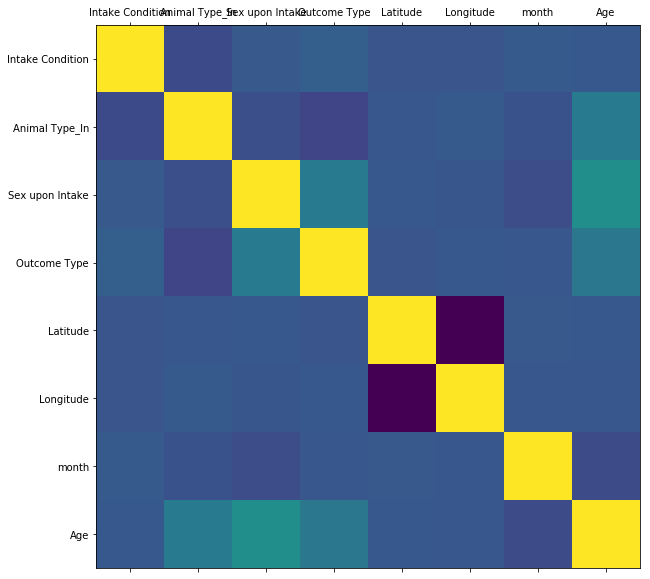

In [22]:
import matplotlib.pyplot as plt
corr = stray_clustering.corr()
fig, ax = plt.subplots(figsize=(10, 10))
ax.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns);

In [23]:
corr

,Intake Condition,Animal Type_In,Sex upon Intake,Outcome Type,Latitude,Longitude,month,Age
Intake Condition,1.000000,-0.061763,0.015513,0.048576,-0.006046,-0.006276,0.021792,0.007327
Animal Type_In,-0.061763,1.000000,-0.032329,-0.080227,0.003732,0.018393,-0.022490,0.201793
Sex upon Intake,0.015513,-0.032329,1.000000,0.201711,0.006095,-0.001116,-0.046267,0.310251
Outcome Type,0.048576,-0.080227,0.201711,1.000000,-0.007609,0.007041,0.001019,0.174713
Latitude,-0.006046,0.003732,0.006095,-0.007609,1.000000,-0.368171,0.013197,0.009864
Longitude,-0.006276,0.018393,-0.001116,0.007041,-0.368171,1.000000,0.002956,0.001887
month,0.021792,-0.022490,-0.046267,0.001019,0.013197,0.002956,1.000000,-0.052162
Age,0.007327,0.201793,0.310251,0.174713,0.009864,0.001887,-0.052162,1.000000


In [24]:
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [25]:
svc = SVC()
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)
acc_svc

C:\Users\Alex Hilton\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex Hilton\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


61.73

In [26]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

C:\Users\Alex Hilton\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


75.34

In [27]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian

C:\Users\Alex Hilton\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


50.83

In [28]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)
acc_linear_svc

C:\Users\Alex Hilton\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex Hilton\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


41.57

In [29]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)
acc_sgd

C:\Users\Alex Hilton\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\Alex Hilton\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


24.8

In [30]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

98.94

In [31]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest

C:\Users\Alex Hilton\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


98.94

In [32]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, 
              acc_random_forest, acc_gaussian, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Random Forest,98.94
6,Decision Tree,98.94
1,KNN,75.34
0,Support Vector Machines,61.73
3,Naive Bayes,50.83
5,Linear SVC,41.57
4,Stochastic Gradient Decent,24.80


In [33]:
y_test['Y_pred'] = Y_pred

C:\Users\Alex Hilton\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [34]:
y_test

,Outcome Type,Y_pred
5899,0,3
1270,0,0
7587,3,0
125,3,0
3080,4,0
10232,0,0
1238,4,4
4284,4,4
6149,4,4
9375,4,4


In [35]:
fail = 0;
tester = y_test.reset_index()
for i in range(len(tester)):
        if tester['Outcome Type'][i] != tester['Y_pred'][i]:
            fail += 1
fail_rate = fail/len(tester)*100
fail_rate

37.226548016314425

In [36]:
100-fail_rate

62.773451983685575